In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import os
%matplotlib inline
path = os.getcwd().split('/')

machine_path = '/' + path[1] + '/' + path[2]

plt.style.use(machine_path+'/opt/scripts/des.mplstyle')


3605.4029215967075


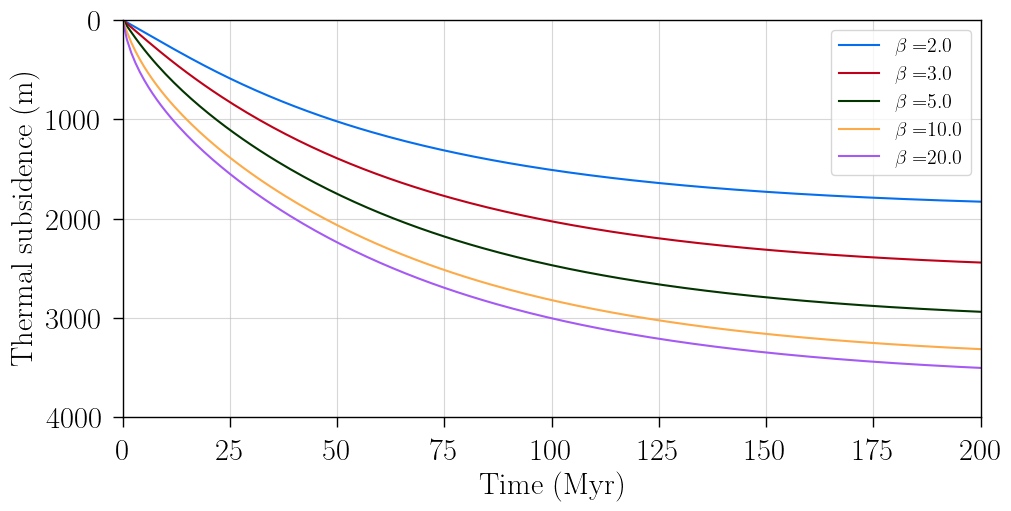

In [4]:
aL = 125000.0 #espessura original da litosfera continental
#z = np.arange(-aL,0.1,1000)
z = np.linspace(0,aL,126)

seg_por_ano = 365.*24.*60.*60. #segundos por ano
betas = [2.0, 3.0, 5.0, 10., 20.] #fator de estiramento
kappa = 0.8E-6 #coef de difusao termica

tau = aL**2/(np.pi**2*kappa)

T1 = 1300.0 #base da litosfera

tempo = np.arange(0.,300.0E6*seg_por_ano,1.0E6*seg_por_ano)

plt.close()
label_size=22
plt.rc('xtick', labelsize=label_size)
plt.rc('ytick', labelsize=label_size)
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10,5))

for beta in betas: 
    m=0
    e = tempo*0
    while m<20:
        mm = 2*m+1
        fac_e = mm*np.pi/beta

        e += (1.0/mm**2)*(np.sin(fac_e)/fac_e)*np.exp(-mm**2*tempo/tau)

        m+=1

    rho0 = 3300. #densidade do manto
    rhow = 1000. #densidade da agua
    alpha = 3.28E-5 #coeficiente de expancao volumetrica (1/K)

    e = e*(4/np.pi**2)*(aL*rho0*alpha*T1)/(rho0-rhow)

    subsidencia = e[0]-e

    ax.plot(tempo/seg_por_ano/1.0E6, subsidencia, label=r'$\beta = $'+str(beta))
    
ax.legend(loc='upper right')    
ax.set_ylim([4000, 0])
ax.set_xlim([0, 200])
ax.grid(':k', alpha=0.5)

label_fsize = 22
xlabel = 'Time (Myr)'
ax.set_xlabel(xlabel, fontsize=label_fsize)

ylabel = 'Thermal subsidence (m)'
ax.set_ylabel(ylabel, fontsize=label_fsize)

print(subsidencia[-1])

fig.savefig(f'{machine_path}/opt/scripts/out/plots/McKenzie_analitico.pdf', dpi=400)
fig.savefig(f'{machine_path}/opt/scripts/out/plots/McKenzie_analitico.png', dpi=400)